In [704]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [705]:
data = pd.read_csv('../dataset/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [706]:
data['Transported'] = data['Transported'].astype(int)
data['CryoSleep'] = data['CryoSleep'].fillna(0).astype(int)
data['VIP'] = data['VIP'].fillna(0).astype(int)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [707]:
data['PassengerGroup'] = data['PassengerId'].str.split('_').str[0].astype(int)
data['more_than_one_in_group'] = data['PassengerGroup'].duplicated(keep=False).astype(int)
data = data.drop(columns='PassengerGroup')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1


In [708]:
X = data.drop(columns='Transported')
y = data['Transported']

In [709]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1


In [710]:
data['LastName'] = data['Name'].str.split(' ').str[-1]
data['has_duplicate_lastname'] = data['LastName'].duplicated(keep=False).astype(int)
data = data.drop(columns='LastName')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group,has_duplicate_lastname
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,1
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,1


In [711]:
data['RoomService'] = data['RoomService'].fillna(data['RoomService'].mean())
data['FoodCourt'] = data['FoodCourt'].fillna(data['FoodCourt'].mean())
data['ShoppingMall'] = data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
data['Spa'] = data['Spa'].fillna(data['Spa'].mean())
data['VRDeck'] = data['VRDeck'].fillna(data['VRDeck'].mean())
data['Age'] = data['Age'].fillna(data['Age'].mean())

data['duplicated_name'] = data['Name'].duplicated(keep=False).astype(int)

In [712]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group,has_duplicate_lastname,duplicated_name
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,1,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,1,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,1,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,1,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,1,0


In [713]:
new_set = data[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
                'Spa', 'VRDeck', 'CryoSleep', 'Transported', 'duplicated_name', 
                'has_duplicate_lastname', 'more_than_one_in_group', 'Cabin', 'HomePlanet', 'Destination']].copy()

new_set.loc[:, 'total_spent'] = (
    new_set['RoomService'] +
    new_set['FoodCourt'] +
    new_set['ShoppingMall'] +
    new_set['Spa'] +
    new_set['VRDeck']
)

new_set.loc[:, 'room_service_plus_food_court'] = (
    new_set['RoomService'] + new_set['FoodCourt']
)

new_set.loc[:, 'room_service_plus_shopping_mall'] = (
    new_set['RoomService'] + new_set['ShoppingMall']
)

new_set.loc[:, 'room_service_plus_spa'] = (
    new_set['RoomService'] + new_set['Spa']
)

new_set.loc[:, 'food_court_plus_shopping_mall'] = (
    new_set['FoodCourt'] + new_set['ShoppingMall']
)

new_set.loc[:, 'food_court_plus_spa'] = (
    new_set['FoodCourt'] + new_set['Spa']
)

new_set['planet_avg_spent'] = new_set.groupby('HomePlanet')['total_spent'].transform('mean')
new_set['planet_spent_ratio'] = new_set['total_spent'] / (new_set['planet_avg_spent'] + 1)

new_set['spa_ratio'] = new_set['Spa'] / (new_set['total_spent'] + 1)
new_set['vrdeck_ratio'] = new_set['VRDeck'] / (new_set['total_spent'] + 1)
new_set['food_ratio'] = new_set['FoodCourt'] / (new_set['total_spent'] + 1)

destination_dummies = pd.get_dummies(new_set['Destination'], prefix='destination', drop_first=True).astype(int)
new_set = pd.concat([new_set.drop(columns=['Destination']), destination_dummies], axis=1)



new_set

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Transported,duplicated_name,...,room_service_plus_spa,food_court_plus_shopping_mall,food_court_plus_spa,planet_avg_spent,planet_spent_ratio,spa_ratio,vrdeck_ratio,food_ratio,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,3481.492644,0.000000,0.000000,0.000000,0.000000,0,1
1,24.0,0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,658.0,34.0,558.0,706.296089,1.040583,0.744912,0.059701,0.012212,0,1
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,6758.0,3576.0,10291.0,3481.492644,2.981485,0.646668,0.004719,0.344376,0,1
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,3329.0,1654.0,4612.0,3481.492644,1.486292,0.643037,0.037280,0.247827,0,1
4,16.0,0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,868.0,221.0,635.0,706.296089,1.542494,0.517399,0.001832,0.064103,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,...,1643.0,6819.0,8462.0,3481.492644,2.451118,0.192456,0.008668,0.798758,0,0
8689,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0.0,0.0,0.0,706.296089,0.000000,0.000000,0.000000,0.000000,1,0
8690,26.0,0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,1.0,1872.0,1.0,706.296089,2.648113,0.000534,0.000000,0.000000,0,1
8691,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,...,353.0,1049.0,1402.0,3481.492644,1.331518,0.076110,0.697499,0.226175,0,0


In [714]:
new_set.columns

Index(['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'CryoSleep', 'Transported', 'duplicated_name',
       'has_duplicate_lastname', 'more_than_one_in_group', 'Cabin',
       'HomePlanet', 'total_spent', 'room_service_plus_food_court',
       'room_service_plus_shopping_mall', 'room_service_plus_spa',
       'food_court_plus_shopping_mall', 'food_court_plus_spa',
       'planet_avg_spent', 'planet_spent_ratio', 'spa_ratio', 'vrdeck_ratio',
       'food_ratio', 'destination_PSO J318.5-22', 'destination_TRAPPIST-1e'],
      dtype='object')

In [715]:
from sklearn.cluster import KMeans
sub_set_1 = new_set[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent']]
sub_set_1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_spent
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,8536.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1873.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,4637.0


In [716]:
scaler = StandardScaler()
sub_set_scaled = pd.DataFrame(
    scaler.fit_transform(sub_set_1),
    columns=sub_set_1.columns,
    index=sub_set_1.index
)
sub_set_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_spent
0,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,-0.525934
1,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,-0.263054
2,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782,3.182605
3,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708,1.322799
4,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258,-0.136257
...,...,...,...,...,...,...,...
8688,0.848924,-0.340590,3.989682,-0.290817,1.184286,-0.203720,2.522904
8689,-0.755179,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,-0.525934
8690,-0.197230,-0.340590,-0.287314,2.842851,-0.275774,-0.269023,0.143053
8691,0.221232,-0.340590,0.370637,-0.290817,0.037223,2.585740,1.130282


In [717]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(sub_set_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


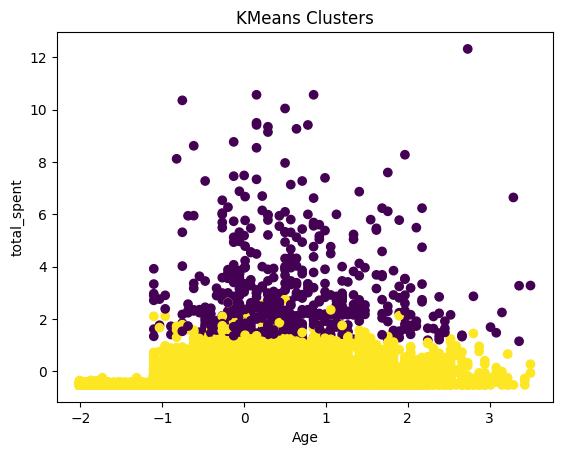

In [718]:
sub_set = sub_set_1.copy()
labels = kmeans.labels_
sub_set['cluster'] = labels

plt.scatter(
    sub_set_scaled['Age'],
    sub_set_scaled['total_spent'],
    c=labels,
    cmap='viridis'
)
plt.xlabel('Age')
plt.ylabel('total_spent')
plt.title('KMeans Clusters')
plt.show()

In [719]:
new_set['cluster_1'] = sub_set['cluster']
new_set

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Transported,duplicated_name,...,food_court_plus_shopping_mall,food_court_plus_spa,planet_avg_spent,planet_spent_ratio,spa_ratio,vrdeck_ratio,food_ratio,destination_PSO J318.5-22,destination_TRAPPIST-1e,cluster_1
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,3481.492644,0.000000,0.000000,0.000000,0.000000,0,1,1
1,24.0,0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,34.0,558.0,706.296089,1.040583,0.744912,0.059701,0.012212,0,1,1
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,3576.0,10291.0,3481.492644,2.981485,0.646668,0.004719,0.344376,0,1,0
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,1654.0,4612.0,3481.492644,1.486292,0.643037,0.037280,0.247827,0,1,1
4,16.0,0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,221.0,635.0,706.296089,1.542494,0.517399,0.001832,0.064103,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,...,6819.0,8462.0,3481.492644,2.451118,0.192456,0.008668,0.798758,0,0,0
8689,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0.0,0.0,706.296089,0.000000,0.000000,0.000000,0.000000,1,0,1
8690,26.0,0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,1872.0,1.0,706.296089,2.648113,0.000534,0.000000,0.000000,0,1,1
8691,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,...,1049.0,1402.0,3481.492644,1.331518,0.076110,0.697499,0.226175,0,0,1


In [720]:
new_set[['deck', 'num', 'side']] = new_set['Cabin'].str.split('/', expand=True)

new_set['num'] = pd.to_numeric(new_set['num'], errors='coerce')

new_set['deck'] = new_set['deck'].fillna('Unknown')
new_set['side'] = new_set['side'].fillna('Unknown')
new_set['num'] = new_set['num'].fillna(0)

deck_dummies = (pd.get_dummies(new_set['deck'], prefix='deck', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)

deck_dummies = (pd.get_dummies(new_set['side'], prefix='side', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)


home_planet_dummies = pd.get_dummies(new_set['HomePlanet'], prefix='home_planet', drop_first=True).astype(int)
new_set = pd.concat([new_set, home_planet_dummies], axis=1)



new_set = new_set.drop(['deck', 'side', 'Cabin', 'HomePlanet'], axis=1)
new_set

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Transported,duplicated_name,...,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Unknown,side_S,side_Unknown,home_planet_Europa,home_planet_Mars
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,16.0,0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,26.0,0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
8691,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [721]:
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer

train_set = new_set.drop(columns='Transported')
target = new_set['Transported']


X_train, X_test, y_train, y_test = train_test_split(train_set, target, test_size=0.1, random_state=42, stratify=target)

# scaler = Normalizer()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# 
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

model = XGBClassifier(
    n_estimators=2300,          
    learning_rate=0.008,         
    max_depth=6,                
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=0.1,                  
    reg_lambda=1,              
    reg_alpha=0,                
    scale_pos_weight=None,      
    random_state=42,
    tree_method='hist',         
    eval_metric='logloss',      
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [722]:
model.score(X_test, y_test)

0.8275862068965517

In [723]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       432
           1       0.83      0.82      0.83       438

    accuracy                           0.83       870
   macro avg       0.83      0.83      0.83       870
weighted avg       0.83      0.83      0.83       870



### TEST SET

In [724]:
train_set = pd.read_csv('../dataset/test.csv')
train_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [725]:
train_set['CryoSleep'] = train_set['CryoSleep'].fillna(0).astype(int)
train_set['duplicated_name'] = train_set['Name'].duplicated(keep=False).astype(int)

train_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,duplicated_name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0
4275,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0


In [726]:
train_set['VIP'] = train_set['VIP'].fillna(0).astype(int)

train_set['RoomService'] = train_set['RoomService'].fillna(train_set['RoomService'].mean())
train_set['FoodCourt'] = train_set['FoodCourt'].fillna(train_set['FoodCourt'].mean())
train_set['ShoppingMall'] = train_set['ShoppingMall'].fillna(train_set['ShoppingMall'].mean())
train_set['Spa'] = train_set['Spa'].fillna(train_set['Spa'].mean())
train_set['VRDeck'] = train_set['VRDeck'].fillna(train_set['VRDeck'].mean())
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].mean())

train_set['LastName'] = train_set['Name'].str.split(' ').str[-1]
train_set['has_duplicate_lastname'] = train_set['LastName'].duplicated(keep=False).astype(int)
train_set = train_set.drop(columns='LastName')

train_set['PassengerGroup'] = train_set['PassengerId'].str.split('_').str[0].astype(int)
train_set['more_than_one_in_group'] = train_set['PassengerGroup'].duplicated(keep=False).astype(int)
train_set = train_set.drop(columns='PassengerGroup')



new_set = train_set[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 
                     'VRDeck', 'CryoSleep', 'duplicated_name', 'has_duplicate_lastname', 
                     'more_than_one_in_group', 'Cabin', 'HomePlanet', 'Destination']].copy()

new_set.loc[:, 'total_spent'] = (
    new_set['RoomService'] +
    new_set['FoodCourt'] +
    new_set['ShoppingMall'] +
    new_set['Spa'] +
    new_set['VRDeck']
)

new_set.loc[:, 'room_service_plus_food_court'] = (
    new_set['RoomService'] + new_set['FoodCourt']
)

new_set.loc[:, 'room_service_plus_shopping_mall'] = (
    new_set['RoomService'] + new_set['ShoppingMall']
)

new_set.loc[:, 'room_service_plus_spa'] = (
    new_set['RoomService'] + new_set['Spa']
)

new_set.loc[:, 'food_court_plus_shopping_mall'] = (
    new_set['FoodCourt'] + new_set['ShoppingMall']
)

new_set.loc[:, 'food_court_plus_spa'] = (
    new_set['FoodCourt'] + new_set['Spa']
)

new_set['planet_avg_spent'] = new_set.groupby('HomePlanet')['total_spent'].transform('mean')
new_set['planet_spent_ratio'] = new_set['total_spent'] / (new_set['planet_avg_spent'] + 1)
new_set['spa_ratio'] = new_set['Spa'] / (new_set['total_spent'] + 1)
new_set['vrdeck_ratio'] = new_set['VRDeck'] / (new_set['total_spent'] + 1)
new_set['food_ratio'] = new_set['FoodCourt'] / (new_set['total_spent'] + 1)

destination_dummies = pd.get_dummies(new_set['Destination'], prefix='destination', drop_first=True).astype(int)
new_set = pd.concat([new_set.drop(columns=['Destination']), destination_dummies], axis=1)


In [727]:
new_set[['deck', 'num', 'side']] = new_set['Cabin'].str.split('/', expand=True)

new_set['num'] = pd.to_numeric(new_set['num'], errors='coerce')

new_set['deck'] = new_set['deck'].fillna('Unknown')
new_set['side'] = new_set['side'].fillna('Unknown')
new_set['num'] = new_set['num'].fillna(0)

deck_dummies = (pd.get_dummies(new_set['deck'], prefix='deck', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)

deck_dummies = (pd.get_dummies(new_set['side'], prefix='side', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)

new_set = new_set.drop(['deck', 'side', 'Cabin'], axis=1)

home_planet_dummies = pd.get_dummies(new_set['HomePlanet'], prefix='home_planet', drop_first=True).astype(int)
new_set = pd.concat([new_set, home_planet_dummies], axis=1)
new_set = new_set.drop(columns='HomePlanet')

In [728]:
# scaled_new_set = scaler.transform(new_set)
# scaled_new_set = pd.DataFrame(scaled_new_set, columns=X_train.columns, index=new_set.index)
# scaled_new_set

In [729]:
passenger_id = train_set['PassengerId']

In [730]:
y_pred = model.predict(new_set)
y_pred

ValueError: feature_names mismatch: ['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'duplicated_name', 'has_duplicate_lastname', 'more_than_one_in_group', 'total_spent', 'room_service_plus_food_court', 'room_service_plus_shopping_mall', 'room_service_plus_spa', 'food_court_plus_shopping_mall', 'food_court_plus_spa', 'planet_avg_spent', 'planet_spent_ratio', 'spa_ratio', 'vrdeck_ratio', 'food_ratio', 'destination_PSO J318.5-22', 'destination_TRAPPIST-1e', 'cluster_1', 'num', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'deck_Unknown', 'side_S', 'side_Unknown', 'home_planet_Europa', 'home_planet_Mars'] ['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'duplicated_name', 'has_duplicate_lastname', 'more_than_one_in_group', 'total_spent', 'room_service_plus_food_court', 'room_service_plus_shopping_mall', 'room_service_plus_spa', 'food_court_plus_shopping_mall', 'food_court_plus_spa', 'planet_avg_spent', 'planet_spent_ratio', 'spa_ratio', 'vrdeck_ratio', 'food_ratio', 'destination_PSO J318.5-22', 'destination_TRAPPIST-1e', 'num', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'deck_Unknown', 'side_S', 'side_Unknown', 'home_planet_Europa', 'home_planet_Mars']
expected cluster_1 in input data

In [ ]:
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Transported': y_pred.astype(bool)
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission файлът е готов: submission.csv")

In [ ]:
importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)